In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import theano as tt
import numpy as np
import scipy.stats
import tqdm

sns.set(font_scale=1.5)
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dst = pd.read_hdf('Dst_data.h5')
dst.head()

,Dst
1963-01-01 00:30:00,-6.0
1963-01-01 01:30:00,-5.0
1963-01-01 02:30:00,-5.0
1963-01-01 03:30:00,-3.0
1963-01-01 04:30:00,-3.0


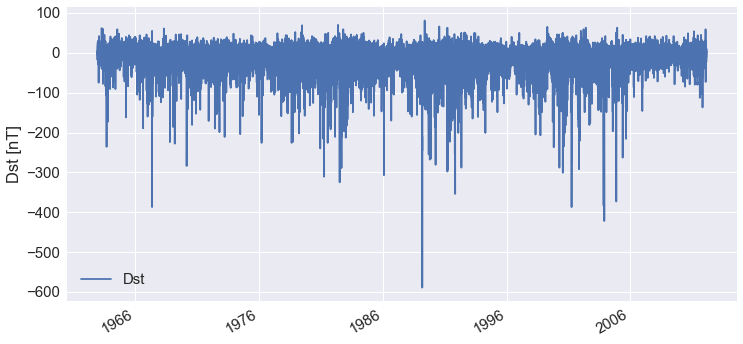

In [3]:
dst = pd.read_hdf('Dst_data.h5')
dst.plot(figsize=(12,6))
plt.ylabel('Dst [nT]');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


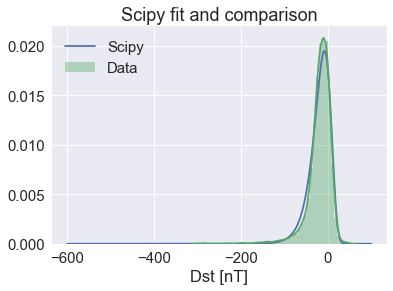

In [4]:
d = scipy.stats.gumbel_l.fit(dst.loc['2000'])
XX = np.linspace(-600, 100, 1000)
plt.plot(XX, scipy.stats.gumbel_l(*d).pdf(XX), label='Scipy')

sns.distplot(dst.loc['2000'], label='Data')
plt.xlabel('Dst [nT]')
plt.title('Scipy fit and comparison')
plt.legend();

In [ ]:
def logp(value):
     return value - pm.math.exp(value)

with pm.Model() as model:
    scale = pm.HalfNormal('scale', sd=10)
    loc = pm.Uniform('loc', -100, 100)
    y = (dst.loc['2000'].values - loc) / scale
    gumbel_l = pm.DensityDist('gumbel_l', logp, testval=0, observed=y)
    trace = pm.sample(2000, )

    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [loc_interval__, scale_log__]
 94%|█████████▍| 2349/2500 [00:06<00:00, 384.65it/s]

In [ ]:
pm.traceplot(trace, combined=True)
pm.summary(trace)

In [ ]:
# don't seem to be able to use PPC without defining a random()

#     y = (dst.loc['2000'].values - loc) / scale

ppc = np.asarray([scipy.stats.gumbel_l(scale=trace['scale'][ii], 
                                       loc=trace['loc'][ii]).rvs(size=10)
                  for ii, v in enumerate(np.random.randint(0, len(trace), 1000))])



In [ ]:
d = scipy.stats.gumbel_l.fit(dst.loc['2000'])
XX = np.linspace(-600, 100, 1000)

plt.plot(XX, scipy.stats.gumbel_l(*d).pdf(XX), label='Scipy')

sns.distplot(dst.loc['2000'], label='Data')

sns.distplot(ppc.flatten(), label='pymc3', color='r')


plt.xlabel('Dst [nT]')
plt.title('Scipy fit and comparison')
plt.legend();
